In [1]:
import pandas as pd

In [2]:
pip list

Package                 Version
----------------------- -----------
asttokens               3.0.1
colorama                0.4.6
comm                    0.2.3
debugpy                 1.8.17
decorator               5.2.1
executing               2.2.1
ipykernel               7.1.0
ipython                 9.7.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.9.1
matplotlib-inline       0.2.1
nest-asyncio            1.6.0
numpy                   2.3.5
packaging               25.0
pandas                  2.3.3
parso                   0.8.5
pip                     25.2
platformdirs            4.5.0
prompt_toolkit          3.0.52
psutil                  7.1.3
pure_eval               0.2.3
Pygments                2.19.2
python-dateutil         2.9.0.post0
pytz                    2025.2
pyzmq                   27.1.0
six                     1.17.0
stack-data              0.6.3
tornado                 6.5.2
traitlets            

Я начинающий аналитик данных и не знаю python. Объясняй все шаги, которые ты выолняешь и пиши код, как начинающий программист. Напиши код на Python для загрузки CSV файла 'transactions.csv' в DataFrame при помощи pandas. Датасет содержит транзакции продаж с колонками trDte, bcode, clientID, item, itemGroup, quantity, amount. Убедись, что колонка Date преобразована в тип datetime. Выведи первые 5 строк и основную информацию о датасете.

In [ ]:
# Импортируем библиотеки — это как включить нужные инструменты
import pandas as pd # для работы с таблицами
import numpy as np # для математических операций
import matplotlib.pyplot as plt  # для графиков
import seaborn as sns  # для графиков
from pandas.tseries.offsets import DateOffset

In [11]:
# Загружаем таблицу из файла в переменную df (data frame)
df = pd.read_csv('C:/Users/maris/OneDrive/Рабочий стол/transaction.csv')

# Преобразуем столбец 'trDte' из текста в формат даты и времени, , УЧИТЫВАЯ, что дата в формате ДД.ММ.ГГГГ
df['trDte'] = pd.to_datetime(df['trDte'], dayfirst=True)

# Выводим первые 5 строк таблицы, чтобы посмотреть, как она выглядит
print("Первые 5 строк данных:")
print(df.head())

# Выводим общую информацию о датафрейме
print("\nОбщая информация о датасете:")
print(df.info())

Первые 5 строк данных:
       trDte          bcode     clientID      item  \
0 2017-09-01  code000000001  client13166   sku8444   
1 2017-09-01  code000000001  client13166  sku12545   
2 2017-09-01  code000000001  client13166   sku3391   
3 2017-09-01  code000000001  client13166  sku20444   
4 2017-09-01  code000000002   client1239  sku29959   

                      itemGroup  quantity  amount  
0              Скобяные изделия         1      29  
1  Оборудование для сада и дачи         1     329  
2                   Инструменты         1     169  
3                   Инструменты         2     578  
4              Скобяные изделия         1     329  

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008688 entries, 0 to 1008687
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   trDte      1008688 non-null  datetime64[ns]
 1   bcode      1008688 non-null  object        
 2

Проведи статистический анализ DataFrame с продажами: 
1. Выведи общую информацию: количество строк, столбцов, типы данных 
2. Рассчитай описательную статистику для всех числовых колонок (quantity, amount): min, max, mean, std, median, 25%, 75% 
3. Проверь наличие пропущенных значений 
4. Для каждого числового столбца выведи уникальных значений и их диапазоны

In [15]:
print("========== 1. ОБЩАЯ ИНФОРМАЦИЯ ==========")
print(df.info())

print("\n========== 2. ОПИСАТЕЛЬНАЯ СТАТИСТИКА ==========")
print(df[['quantity', 'amount']].describe())

print("\n========== 3. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ==========")
print(df.isnull().sum())

print("\n========== 4. УНИКАЛЬНЫЕ ЗНАЧЕНИЯ И ДИАПАЗОНЫ ==========")

numeric_cols = ['quantity', 'amount']

for col in numeric_cols:
    unique_count = df[col].nunique()  # сколько разных значений
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}:")
    print(f"  Уникальных значений: {unique_count}")
    print(f"  Диапазон: от {min_val} до {max_val}")


========== 1. ОБЩАЯ ИНФОРМАЦИЯ ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008688 entries, 0 to 1008687
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   trDte      1008688 non-null  datetime64[ns]
 1   bcode      1008688 non-null  object        
 2   clientID   1008688 non-null  object        
 3   item       1008688 non-null  object        
 4   itemGroup  1008688 non-null  object        
 5   quantity   1008688 non-null  int64         
 6   amount     1008688 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 53.9+ MB
None

========== 2. ОПИСАТЕЛЬНАЯ СТАТИСТИКА ==========
           quantity        amount
count  1.008688e+06  1.008688e+06
mean   2.222474e+00  6.231940e+02
std    5.029007e+00  1.878421e+03
min    0.000000e+00  0.000000e+00
25%    1.000000e+00  5.600000e+01
50%    1.000000e+00  1.500000e+02
75%    2.000000e+00  4.250000e+02
max    1

Создай графики для анализа распределения quantity и amount из DataFrame df. Используй sns.histplot с kde=True и sns.boxplot. Сделай два окна: одно с гистограммами, второе с box plot

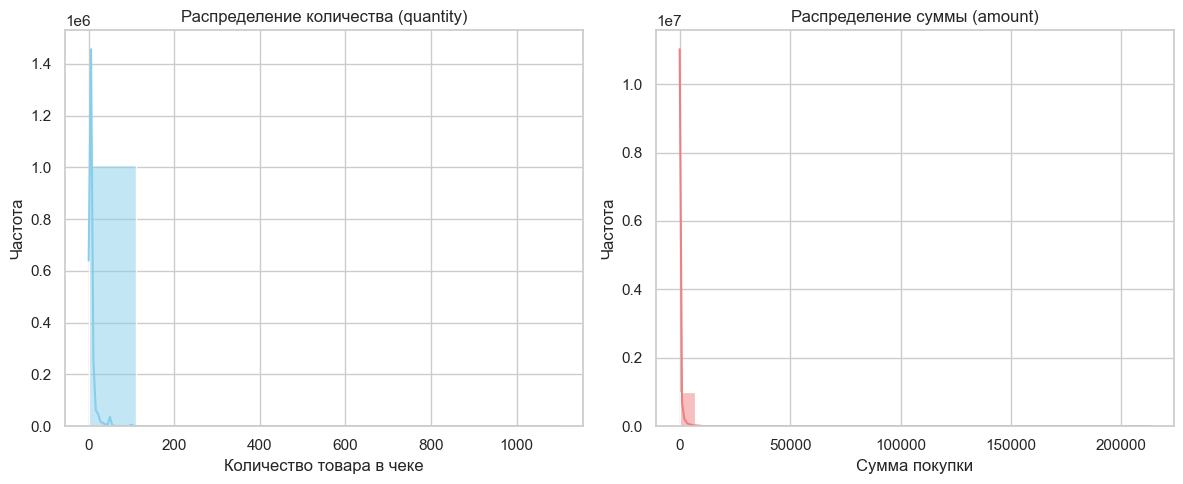

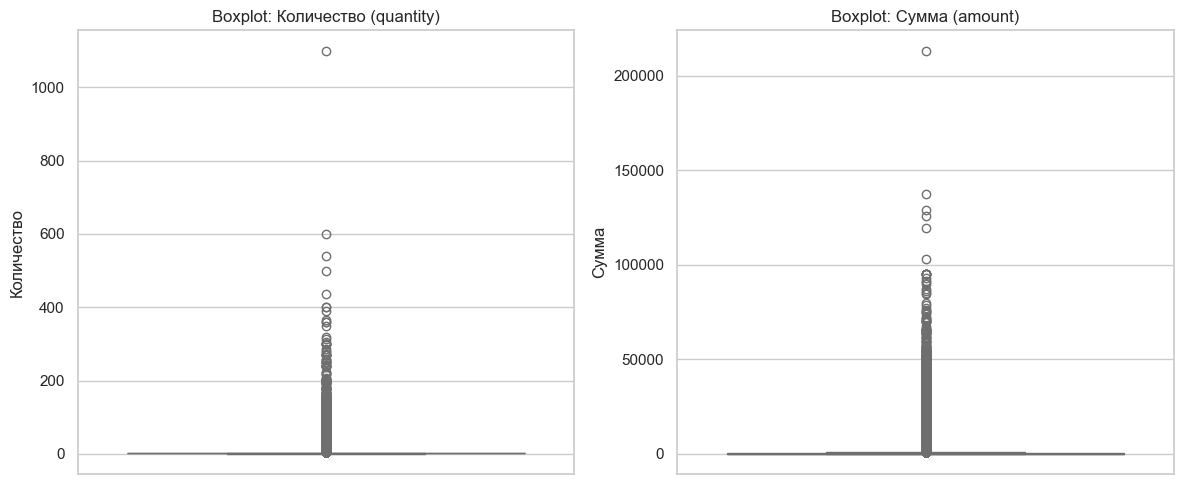

In [16]:
# Настроим общий стиль для графиков (красивее будет)
sns.set(style="whitegrid")

# ==================== ОКНО 1: Гистограммы с линией распределения ====================
plt.figure(figsize=(12, 5))  # Размер окна: 12 ширина, 5 высота

# Гистограмма для quantity (с линией плотности)
plt.subplot(1, 2, 1)  # 1 строка, 2 колонки, первый график
sns.histplot(df['quantity'], kde=True, bins=10, color='skyblue')
plt.title('Распределение количества (quantity)')
plt.xlabel('Количество товара в чеке')
plt.ylabel('Частота')

# Гистограмма для amount (с линией плотности)
plt.subplot(1, 2, 2)  # 1 строка, 2 колонки, второй график
sns.histplot(df['amount'], kde=True, bins=30, color='lightcoral')
plt.title('Распределение суммы (amount)')
plt.xlabel('Сумма покупки')
plt.ylabel('Частота')

# Убираем наложение графиков
plt.tight_layout()
plt.show()

# ==================== ОКНО 2: Ящики с усами (boxplot) ====================
plt.figure(figsize=(12, 5))

# Boxplot для quantity
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='quantity', color='skyblue')
plt.title('Boxplot: Количество (quantity)')
plt.ylabel('Количество')

# Boxplot для amount
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='amount', color='lightcoral')
plt.title('Boxplot: Сумма (amount)')
plt.ylabel('Сумма')

# Убираем наложение графиков
plt.tight_layout()
plt.show()

На основе DataFrame с продажами: 
1. Сгруппируй данные по колонке item (товар) 
2. Для каждого товара рассчитай сумму двух метрик: - Кол-во: sum(quantity) - Сумма продаж: sum(amount) 
3. Отсортируй результат по сумме продаж в убывающем порядке 
4. Выведи только ТОП-5 товаров с самыми большими продажами 5. Сохрани результат в переменную 'top_5_products'

In [17]:
# Шаг 1: Группируем данные по товару (item) и считаем для каждого товара:
# - общее количество (sum quantity)
# - общую сумму продаж (sum amount)
top_products = df.groupby('item')[['quantity', 'amount']].sum()

# Шаг 2: Сортируем по столбцу 'amount' (сумма) от большего к меньшему
top_products_sorted = top_products.sort_values(by='amount', ascending=False)

# Шаг 3: Берём только первые 5 строк — это и есть ТОП-5
top_5_products = top_products_sorted.head(5)

# Шаг 4: Выводим результат на экран
print("ТОП-5 товаров по сумме продаж:")
print(top_5_products)


ТОП-5 товаров по сумме продаж:
          quantity   amount
item                       
sku26161     18902  5373638
sku18199      7250  3951361
sku21947     15304  3918570
sku28128      7705  3027786
sku8342       3512  2113158


Переделай предыдущий код так, чтобы число ТОП товаров было параметром (переменной N). Создай функцию get_top_products(df, n=5), которая: 
1. Принимает DataFrame df и параметр n (количество товаров) 
2. Выполняет группировку, сортировку и фильтрацию как в предыдущем примере 
3. Возвращает DataFrame с n лучшими товарами Протестируй функцию с разными значениями N.

In [20]:
# Шаг 1: Определяем функцию
def get_top_products(df, n=5):
    """
    Функция возвращает топ-N товаров по сумме продаж.
    
    Параметры:
    - df: DataFrame с данными о продажах
    - n: сколько товаров вернуть (по умолчанию 5)
    
    Возвращает:
    - DataFrame с топ-N товарами: их количество и сумма продаж
    """
    
    # Шаг 2: Группируем по 'item', считаем сумму quantity и amount
    grouped = df.groupby('item')[['quantity', 'amount']].sum()
    
    # Шаг 3: Сортируем по 'amount' (сумма продаж) от большего к меньшему
    sorted_data = grouped.sort_values(by='amount', ascending=False)
    
    # Шаг 4: Берём первые n строк
    top_n = sorted_data.head(n)
    
    # Шаг 5: Возвращаем результат
    return top_n


На основе исходного DataFrame:
1. Задай переменную end_date = '2019-10-31'
2. Задай переменную period_months = 6
3. Рассчитай начальную дату: start_date = end_date - 6 месяцев
4. Отфильтруй DataFrame так, чтобы осталась только дата >= start_date и дата <= end_date
5. На отфильтрованных данных запусти функцию get_top_products(filtered_df, n=5)
6. Вывести результат

In [21]:
# 1. Конечная дата
end_date = '2019-10-31'

# 2. Сколько месяцев назад
period_months = 6

# 3. Превращаем в дату и вычитаем 6 месяцев
end_date = pd.to_datetime(end_date)
start_date = end_date - pd.DateOffset(months=period_months)

# 4. Фильтруем данные по дате
filtered_df = df[(df['trDte'] >= start_date) & (df['trDte'] <= end_date)]

# 5. Применяем функцию get_top_products
top_5_recent = get_top_products(filtered_df, n=5)

# 6. Выводим результат
print("ТОП-5 товаров за последние 6 месяцев (с", start_date.date(), "по", end_date.date(), "):")
print(top_5_recent)

ТОП-5 товаров за последние 6 месяцев (с 2019-04-30 по 2019-10-31 ):
          quantity   amount
item                       
sku26161      7993  2379453
sku18199      3066  1848072
sku21947      5831  1543669
sku8342       1509   970053
sku22208        89   896275


На основе исходного DataFrame выполни анализ по клиентам:
1. Сгруппируй данные по client
2. Для каждого клиента рассчитай: - Общее количество
товаров (sum(quantity)) - Общую сумму закупок
(sum(amount)) - Количество уникальных дат визитов
3. Отсортируй по сумме закупок в убывающем порядке
4. Сохрани результат в переменную 'client_stats’. После
этого выведи статистику по столбцам: - Для quantity:
min, max, mean, median - Для amount: min, max, mean,
median - Для количества дат визитов: min, max, mean

In [22]:
# 1. Группировка и расчёт метрик
client_stats = df.groupby('clientID').agg(
    total_quantity=('quantity', 'sum'),
    total_amount=('amount', 'sum'),
    visit_days=('trDte', 'nunique')
).reset_index()

# 2. Сортировка по выручке (от большего к меньшему)
client_stats = client_stats.sort_values(by='total_amount', ascending=False)

# 3. Вывод статистики
print("Статистика по клиентам:")
print("\n1. По количеству купленного товара (quantity):")
print(f"  Минимум:  {client_stats['total_quantity'].min()}")
print(f"  Максимум: {client_stats['total_quantity'].max()}")
print(f"  Среднее:  {client_stats['total_quantity'].mean():.2f}")
print(f"  Медиана:  {client_stats['total_quantity'].median()}")

print("\n2. По сумме покупок (amount):")
print(f"  Минимум:  {client_stats['total_amount'].min()}")
print(f"  Максимум: {client_stats['total_amount'].max()}")
print(f"  Среднее:  {client_stats['total_amount'].mean():.2f}")
print(f"  Медиана:  {client_stats['total_amount'].median()}")

print("\n3. По количеству дней визитов:")
print(f"  Минимум:  {client_stats['visit_days'].min()}")
print(f"  Максимум: {client_stats['visit_days'].max()}")
print(f"  Среднее:  {client_stats['visit_days'].mean():.2f}")

Статистика по клиентам:

1. По количеству купленного товара (quantity):
  Минимум:  1
  Максимум: 5457
  Среднее:  52.44
  Медиана:  21.0

2. По сумме покупок (amount):
  Минимум:  10
  Максимум: 3887309
  Среднее:  14705.66
  Медиана:  6410.0

3. По количеству дней визитов:
  Минимум:  1
  Максимум: 174
  Среднее:  6.18


На основе датафрейма client_stats:
1. Отфильтруй клиентов, у которых: - Количество товаров >= 2000 ИЛИ - Сумма >= 500000
2. Выведи количество найденных клиентов и их список
3. Покажи эти клиентов с их основными характеристиками
4. Опционально: сохрани их ID для дальнейшего анализа в список 'extreme_clients'

In [23]:
# 1. Фильтрация: quantity >= 2000 ИЛИ amount >= 500000
extreme_clients_df = client_stats[
    (client_stats['total_quantity'] >= 2000) | 
    (client_stats['total_amount'] >= 500000)
]

# 2. Вывод количества
print(f"Найдено экстремальных клиентов: {len(extreme_clients_df)}")

# 3. Вывод таблицы
print("\nСписок экстремальных клиентов:")
print(extreme_clients_df)

# 4. (Опционально) Сохраняем ID клиентов в список
extreme_clients = extreme_clients_df['clientID'].tolist()

print("\nID экстремальных клиентов:")
print(extreme_clients)

Найдено экстремальных клиентов: 9

Список экстремальных клиентов:
          clientID  total_quantity  total_amount  visit_days
21313  client29182            3434       3887309         107
6283   client15654            5457       1443255         174
41389   client8778            1617        986618          17
7823    client1704            1187        636101          23
25592  client33032            1255        537397          74
30646  client37582            2526        502515         159
23307  client30977            2234        407138         121
26757  client34081            2470        386355         157
11458  client20310            3265        366035         102

ID экстремальных клиентов:
['client29182', 'client15654', 'client8778', 'client1704', 'client33032', 'client37582', 'client30977', 'client34081', 'client20310']


На основе датафрейма client_stats:
1. Отфильтруй клиентов, у которых количество дат визитов == 1
2. Подсчитай количество таких клиентов
3. Выведи статистику по этим клиентам: - Сколько их всего - Какой средний чек у них - Какой средний объем покупок

In [24]:
# 1. Фильтруем клиентов с одним визитом
one_time_clients = client_stats[client_stats['visit_days'] == 1]

# 2. Считаем количество
count_one_time = len(one_time_clients)
print(f"Количество клиентов с одним визитом: {count_one_time}")

# 3. Статистика:
avg_amount = one_time_clients['total_amount'].mean()
avg_quantity = one_time_clients['total_quantity'].mean()

print(f"Средний чек (средняя сумма покупки): {avg_amount:.2f}")
print(f"Среднее количество товаров в чеке: {avg_quantity:.2f}")

Количество клиентов с одним визитом: 12859
Средний чек (средняя сумма покупки): 3535.45
Среднее количество товаров в чеке: 8.67


На основе исходного DataFrame:
1. Перед расчетом убедись, что нет строк с quantity = 0 (это может привести к делению на 0) - Подсчитай количество таких строк - Если есть, выведи их и удали из DataFrame
2. Создай новый столбец 'price' = amount / quantity
3. Выведи статистику по новому столбцу price: - min, max, mean, median
4. Выведи первые 10 строк исходного DataFrame + новый столбец price

In [25]:
# 1. Проверяем и удаляем строки с quantity = 0
zero_quantity_rows = df[df['quantity'] == 0]
count_zero = len(zero_quantity_rows)

if count_zero > 0:
    print(f"⚠️ Найдено {count_zero} строк с quantity = 0. Вот они:")
    print(zero_quantity_rows)
    df = df[df['quantity'] != 0]  # Удаляем
    print(f"✅ Эти строки удалены.")
else:
    print("✅ Нет строк с quantity = 0. Можно продолжать.")

# 2. Создаём столбец price
df['price'] = df['amount'] / df['quantity']

# 3. Статистика по price
print("\n📈 Статистика по цене (price):")
print(f"Минимальная цена: {df['price'].min():.2f}")
print(f"Максимальная цена: {df['price'].max():.2f}")
print(f"Средняя цена: {df['price'].mean():.2f}")
print(f"Медианная цена: {df['price'].median():.2f}")

# 4. Вывод первых 10 строк
print("\n📋 Первые 10 строк данных с новым столбцом 'price':")
print(df[['trDte', 'bcode', 'clientID', 'item', 'quantity', 'amount', 'price']].head(10))

⚠️ Найдено 1 строк с quantity = 0. Вот они:
            trDte          bcode     clientID      item         itemGroup  \
920771 2019-09-14  code000261741  client24307  sku26360  Скобяные изделия   

        quantity  amount  
920771         0       1  
✅ Эти строки удалены.

📈 Статистика по цене (price):
Минимальная цена: 0.00
Максимальная цена: 119500.00
Средняя цена: 389.78
Медианная цена: 102.89

📋 Первые 10 строк данных с новым столбцом 'price':
       trDte          bcode     clientID      item  quantity  amount  price
0 2017-09-01  code000000001  client13166   sku8444         1      29   29.0
1 2017-09-01  code000000001  client13166  sku12545         1     329  329.0
2 2017-09-01  code000000001  client13166   sku3391         1     169  169.0
3 2017-09-01  code000000001  client13166  sku20444         2     578  289.0
4 2017-09-01  code000000002   client1239  sku29959         1     329  329.0
5 2017-09-01  code000000002   client1239  sku19394         4     116   29.0
6 2017-09-01  

На основе DataFrame с рассчитанной ценой товара:
1. Выведи описательную статистику столбца 'price': - Квартили (25%, 50%, 75%) - Минимум и максимум - Межквартильный диапазон (IQR = Q3 - Q1)
2. Рассчитай границы для потенциальных выбросов: - lower_bound = Q1 - 1.5 * IQR - upper_bound = Q3 + 1.5 * IQR
3. Подсчитай количество выбросов (цены за пределами этих границ)
4. Выведи примеры выбросов (10 самых дорогих и 10 самых дешевых товаров) и создай визуализацию гистограммы и box plot

Q1 (25%): 39.00
Q3 (75%): 269.00
IQR: 230.00
Нижняя граница: -306.00
Верхняя граница: 614.00

Количество выбросов: 112596
  → Слишком дешёвые: 0
  → Слишком дорогие: 112596

🔥 10 самых дорогих выбросов:
            item     price  quantity  amount
734936   sku8449  119500.0         1  119500
242769   sku6834   76990.0         1   76990
847552   sku6834   74990.0         1   74990
153014  sku27261   74990.0         1   74990
713368   sku5775   71991.0         1   71991
766446   sku6834   71241.0         1   71241
704822   sku6834   71241.0         1   71241
222969  sku12045   69990.0         1   69990
624879  sku29862   69990.0         1   69990
753313   sku6834   69741.0         1   69741

❄️ 10 самых дешёвых выбросов:
Empty DataFrame
Columns: [item, price, quantity, amount]
Index: []


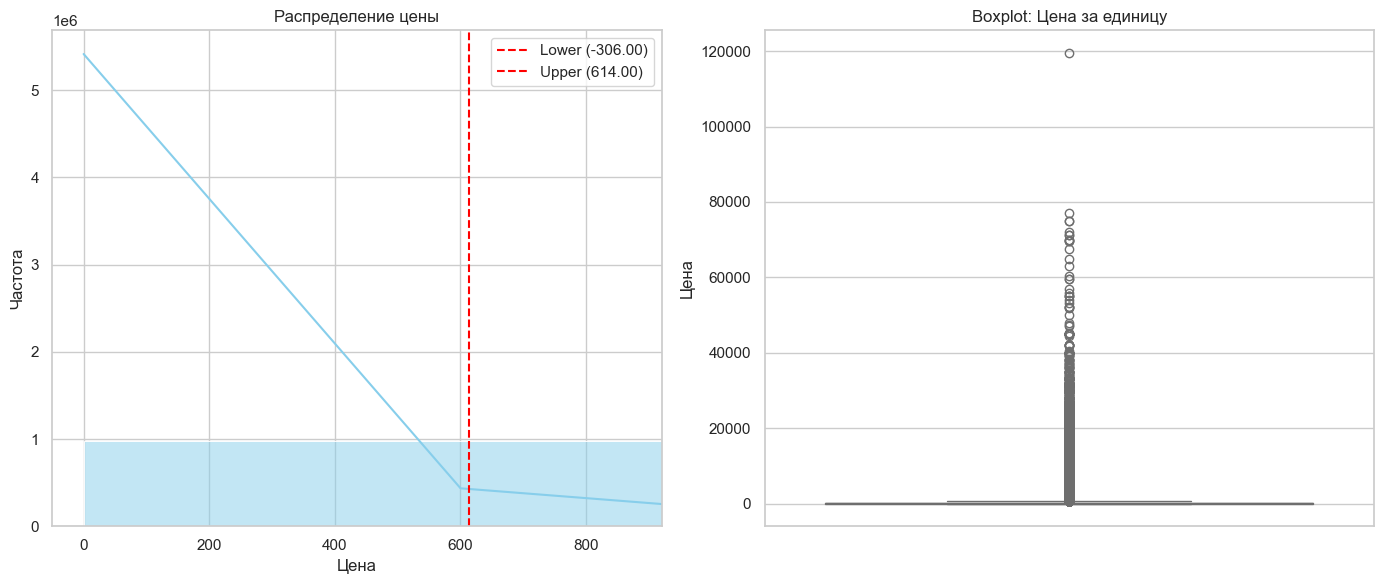

In [26]:
# 1. Статистика и границы выбросов
stats = df['price'].describe()
Q1, Q3 = stats['25%'], stats['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")

# 2. Нахождение выбросов
outliers_low = df[df['price'] < lower_bound]
outliers_high = df[df['price'] > upper_bound]
outliers = pd.concat([outliers_low, outliers_high])

print(f"\nКоличество выбросов: {len(outliers)}")
print(f"  → Слишком дешёвые: {len(outliers_low)}")
print(f"  → Слишком дорогие: {len(outliers_high)}")

# 3. Примеры выбросов
print("\n🔥 10 самых дорогих выбросов:")
print(outliers_high[['item', 'price', 'quantity', 'amount']].sort_values('price', ascending=False).head(10))

print("\n❄️ 10 самых дешёвых выбросов:")
print(outliers_low[['item', 'price', 'quantity', 'amount']].sort_values('price', ascending=True).head(10))

# 4. Графики
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper ({upper_bound:.2f})')
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.legend()
plt.xlim(left=-50, right=upper_bound * 1.5)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='price', color='lightcoral')
plt.title('Boxplot: Цена за единицу')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()

Выполни АВС-анализ товаров по сумме продаж:
1. Сгруппируй данные по item и рассчитай сумму продаж каждого товара
2. Отсортируй товары по сумме продаж в убывающем порядке
3. Рассчитай накопительный процент (cumulative %) для каждого товара: - Общая сумма всех продаж = total_sum - Для каждого товара: cumulative_sum / total_sum * 100
4. На основе накопительного процента распредели товары на
группы: - Группа A: cumulative % <= 80% - Группа B:
cumulative % > 80% and <= 95% - Группа C: cumulative % > 95%
5. Выведи количество товаров в каждой группе и примеры товаров
из каждой группы

In [27]:
# 1. Группируем и считаем сумму
abc_data = df.groupby('item')['amount'].sum().reset_index()

# 2. Сортируем по убыванию
abc_data = abc_data.sort_values(by='amount', ascending=False).reset_index(drop=True)

# 3. Накопительный процент
total_sum = abc_data['amount'].sum()
abc_data['cumulative_sum'] = abc_data['amount'].cumsum()
abc_data['cumulative_percent'] = abc_data['cumulative_sum'] / total_sum * 100

# 4. Присваиваем группу A/B/C
def assign_abc_group(percent):
    if percent <= 80:
        return 'A'
    elif percent <= 95:
        return 'B'
    else:
        return 'C'

abc_data['group'] = abc_data['cumulative_percent'].apply(assign_abc_group)

# 5. Вывод результатов
group_counts = abc_data['group'].value_counts().sort_index()
print("📦 Количество товаров в каждой группе:")
print(group_counts)

print("\n📌 Примеры товаров из каждой группы:")

print("\n🔥 Группа A (до 80%):")
print(abc_data[abc_data['group'] == 'A'][['item', 'amount', 'cumulative_percent']].head(5))

print("\n📦 Группа B (80–95%):")
print(abc_data[abc_data['group'] == 'B'][['item', 'amount', 'cumulative_percent']].head(5))

print("\n📦 Группа C (95–100%):")
print(abc_data[abc_data['group'] == 'C'][['item', 'amount', 'cumulative_percent']].head(5))

📦 Количество товаров в каждой группе:
group
A     5353
B     8234
C    16979
Name: count, dtype: int64

📌 Примеры товаров из каждой группы:

🔥 Группа A (до 80%):
       item   amount  cumulative_percent
0  sku26161  5373638            0.854847
1  sku18199  3951361            1.483435
2  sku21947  3918570            2.106808
3  sku28128  3027786            2.588473
4   sku8342  2113158            2.924637

📦 Группа B (80–95%):
          item  amount  cumulative_percent
5353  sku10822   22836           80.001791
5354  sku10724   22834           80.005424
5355  sku29015   22826           80.009055
5356  sku26094   22824           80.012686
5357  sku19581   22817           80.016316

📦 Группа C (95–100%):
           item  amount  cumulative_percent
13587  sku18189    5357           95.000265
13588  sku13438    5357           95.001117
13589    sku872    5357           95.001969
13590   sku8935    5355           95.002821
13591   sku5421    5355           95.003673


Дополни XYZ-анализ товаров (по количеству): 
Используй для расчета коэффициент вариации = std / mean * 100. На основе коэффициента вариации распредели товары: 
- Группа X: CV < 15% 
- Группа Y: 15% <= CV <= 25% 
- Группа Z: CV > 25%. 
Выведи количество товаров в каждой группе и итоговый датафрейм.

In [28]:
# XYZ-анализ: стабильность спроса по количеству

# 1. Группировка и расчёт mean, std
xyz_data = df.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()

# 2. Обработка пропусков и расчёт CV
xyz_data['std'] = xyz_data['std'].fillna(0)  # если у товара один чек
xyz_data['cv'] = (xyz_data['std'] / xyz_data['mean']) * 100
xyz_data['cv'] = xyz_data['cv'].fillna(0)
xyz_data['cv'] = xyz_data['cv'].replace([float('inf'), -float('inf')], 0)

# 3. Присваиваем группу X/Y/Z
def assign_xyz_group(cv):
    if cv < 15:
        return 'X'
    elif cv <= 25:
        return 'Y'
    else:
        return 'Z'

xyz_data['group_xyz'] = xyz_data['cv'].apply(assign_xyz_group)

# 4. Вывод результатов
xyz_counts = xyz_data['group_xyz'].value_counts().sort_index()
print("📊 Количество товаров по XYZ-группам:")
print(xyz_counts)

print("\n📋 Итоговый датафрейм XYZ-анализа (первые 10 строк):")
print(xyz_data[['item', 'mean', 'std', 'cv', 'group_xyz']].round(2).head(10))

📊 Количество товаров по XYZ-группам:
group_xyz
X    11655
Y     1354
Z    17557
Name: count, dtype: int64

📋 Итоговый датафрейм XYZ-анализа (первые 10 строк):
       item  mean   std      cv group_xyz
0      sku1  1.38  0.52   37.64         Z
1     sku10  2.00  1.22   61.24         Z
2    sku100  1.40  0.88   63.26         Z
3   sku1000  1.27  0.67   52.64         Z
4  sku10000  2.48  2.91  117.09         Z
5  sku10001  2.00  2.41  120.42         Z
6  sku10002  1.00  0.00    0.00         X
7  sku10003  1.00  0.00    0.00         X
8  sku10004  4.33  6.22  143.50         Z
9  sku10005  1.00  0.00    0.00         X


Создай перекрестную таблицу (pivot table) АВС группа x XYZ группа для матрицы ABC-XYZ

In [29]:
# 1. Объединяем ABC и XYZ данные
abc_xyz = pd.merge(
    abc_data[['item', 'group']], 
    xyz_data[['item', 'group_xyz']], 
    on='item', 
    how='inner'
)

# 2. Создаём сводную таблицу
abc_xyz_pivot = pd.pivot_table(
    abc_xyz,
    index='group',
    columns='group_xyz',
    values='item',
    aggfunc='count',
    fill_value=0
)

# 3. Выводим
print("🧩 Матрица ABC × XYZ (количество товаров):")
print(abc_xyz_pivot)

🧩 Матрица ABC × XYZ (количество товаров):
group_xyz     X    Y     Z
group                     
A          1527  297  3529
B          2562  411  5261
C          7566  646  8767


1. Создай функцию abc_xyz_analysis(df, abc_threshold_a=80,
abc_threshold_b=95):
a) Которая выполняет весь АВС-XYZ анализ из предыдущих инструкций
b) Параметры позволяют менять границы групп А и В 2.
Отфильтруй исходный DataFrame за последние 6 месяцев (с
01.05.2019 по 31.10.2019)
2. 3апусти функцию на отфильтрованных данных:
abc_xyz_analysis(df_last_6m)
3. Сравни результаты за весь период и за последние 6 месяцев:
a) Сколько товаров перешло из группы в группу?
b) Какие товары стали важнее?
c) Какие - менее важны? Используй только товары, которые есть в обоих периодах

In [31]:
# Создадим функцию abc_xyz_analysis
def abc_xyz_analysis(df, abc_threshold_a=80, abc_threshold_b=95):
    """
    Функция выполняет полный ABC-XYZ анализ.
    
    Параметры:
    - df: DataFrame с колонками 'item', 'quantity', 'amount'
    - abc_threshold_a: % для границы A (по умолчанию 80)
    - abc_threshold_b: % для границы B (по умолчанию 95)
    
    Возвращает:
    - DataFrame с колонками: item, abc_group, xyz_group
    """
    
    # --- ABC-анализ по сумме продаж (amount) ---
    abc_data = df.groupby('item')['amount'].sum().reset_index()
    abc_data = abc_data.sort_values(by='amount', ascending=False).reset_index(drop=True)
    
    total_amount = abc_data['amount'].sum()
    abc_data['cumsum'] = abc_data['amount'].cumsum()
    abc_data['cum_percent'] = abc_data['cumsum'] / total_amount * 100
    
    def assign_abc(percent):
        if percent <= abc_threshold_a:
            return 'A'
        elif percent <= abc_threshold_b:
            return 'B'
        else:
            return 'C'
    
    abc_data['abc_group'] = abc_data['cum_percent'].apply(assign_abc)

    # --- XYZ-анализ по стабильности количества (quantity) ---
    xyz_data = df.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()
    xyz_data['std'] = xyz_data['std'].fillna(0)
    xyz_data['cv'] = (xyz_data['std'] / xyz_data['mean']) * 100
    xyz_data['cv'] = xyz_data['cv'].replace([float('inf'), -float('inf')], 0).fillna(0)
    
    def assign_xyz(cv):
        if cv < 15:
            return 'X'
        elif cv <= 25:
            return 'Y'
        else:
            return 'Z'
    
    xyz_data['xyz_group'] = xyz_data['cv'].apply(assign_xyz)

    # --- Объединяем ABC и XYZ ---
    result = pd.merge(
        abc_data[['item', 'abc_group']],
        xyz_data[['item', 'xyz_group']],
        on='item',
        how='inner'
    )
    
    return result

# Отфильтруем данные за последние 6 месяцев
# Убедимся, что trDte — в формате даты (если ещё не делали)
df['trDte'] = pd.to_datetime(df['trDte'], dayfirst=True)

# Определяем даты
start_date = '2019-05-01'
end_date = '2019-10-31'

# Фильтруем
df_last_6m = df[(df['trDte'] >= start_date) & (df['trDte'] <= end_date)].copy()

print(f"Количество строк за 6 месяцев: {len(df_last_6m)}")

# Запустим функцию на двух периодах
# Анализ за ВЕСЬ период (уже был ранее, но пересчитаем)
result_full = abc_xyz_analysis(df)
result_full = result_full.rename(columns={'abc_group': 'abc_full', 'xyz_group': 'xyz_full'})

# Анализ за ПОСЛЕДНИЕ 6 месяцев
result_6m = abc_xyz_analysis(df_last_6m)
result_6m = result_6m.rename(columns={'abc_group': 'abc_6m', 'xyz_group': 'xyz_6m'})

# Сравним результаты (только общие товары)
# Объединяем по 'item', оставляя только те, что есть в обоих периодах
comparison = pd.merge(
    result_full,
    result_6m,
    on='item',
    how='inner'  # только общие товары
)

# Считаем, сколько товаров изменили ABC-группу
comparison['abc_changed'] = comparison['abc_full'] != comparison['abc_6m']

n_changed = comparison['abc_changed'].sum()
print(f"📦 Из {len(comparison)} общих товаров, {n_changed} изменили ABC-группу")

# Кто стал важнее / менее важен?
# Функция: улучшилась ли группа? (A > B > C)
def abc_rank(group):
    if group == 'A': return 1
    elif group == 'B': return 2
    else: return 3

comparison['rank_full'] = comparison['abc_full'].apply(abc_rank)
comparison['rank_6m'] = comparison['abc_6m'].apply(abc_rank)

# Улучшились: стали ближе к A
comparison['improved'] = comparison['rank_6m'] < comparison['rank_full']
# Ухудшились: стали дальше от A
comparison['worsened'] = comparison['rank_6m'] > comparison['rank_full']

# Покажем примеры
print("\n🚀 Товары, которые стали ВАЖНЕЕ (перешли в A или из C→B):")
print(comparison[comparison['improved']][['item', 'abc_full', 'abc_6m']].head())

print("\n📉 Товары, которые стали МЕНЕЕ важны:")
print(comparison[comparison['worsened']][['item', 'abc_full', 'abc_6m']].head())

# Сводка по изменениям
print("\n📊 Сводка по изменениям ABC-групп:")
change_summary = comparison.groupby(['abc_full', 'abc_6m']).size().unstack(fill_value=0)
print(change_summary)

Количество строк за 6 месяцев: 347736
📦 Из 21767 общих товаров, 4302 изменили ABC-группу

🚀 Товары, которые стали ВАЖНЕЕ (перешли в A или из C→B):
          item abc_full abc_6m
4521  sku10822        B      A
4522  sku10724        B      A
4532   sku6205        B      A
4533   sku8514        B      A
4538  sku25184        B      A

📉 Товары, которые стали МЕНЕЕ важны:
         item abc_full abc_6m
6     sku9471        A      C
127   sku8752        A      B
235   sku9350        A      C
250  sku27764        A      B
276   sku6216        A      C

📊 Сводка по изменениям ABC-групп:
abc_6m       A     B      C
abc_full                   
A         3341  1007    173
B          515  3944   1776
C            0   831  10180


Сохрани результаты анализа в CSV файлы:
1. Результаты ТОП-5 товаров → 'top_5_products.csv' 2.
2. Статистику по клиентам → 'client_statistics.csv’
3. АВС-анализ товаров → 'abc_analysis.csv’
4. XYZ-анализ товаров → 'xyz_analysis.csv’
5. Матрицу ABC-XYZ → 'abc_xyz_matrix.csv’
6. Данные за последние 6 месяцев → 'last_6_months_data.csv’.
Используй method='w', index=False для сохранения без индекса
Проверь, что файлы успешно созданы, выведи первые 5 строк
каждого файла

In [33]:
# Сохранение в CSV-файлы
# 1. ТОП-5 товаров
top_5_products.to_csv('top_5_products.csv', index=False)

# 2. Статистика по клиентам
client_stats.to_csv('client_statistics.csv', index=False)

# 3. ABC-анализ
abc_data[['item', 'amount', 'cumulative_percent', 'group']].to_csv('abc_analysis.csv', index=False)

# 4. XYZ-анализ
xyz_data[['item', 'mean', 'std', 'cv', 'group_xyz']].to_csv('xyz_analysis.csv', index=False)

# 5. Матрица ABC-XYZ (в формате длинной таблицы, чтобы было проще)
abc_xyz_pivot_reset = abc_xyz_pivot.reset_index()
abc_xyz_pivot_reset.to_csv('abc_xyz_matrix.csv', index=False)

# 6. Данные за последние 6 месяцев (исходные строки)
df_last_6m.to_csv('last_6_months_data.csv', index=False)

# Проверим — прочитаем и выведем первые 5 строк каждого
print("✅ 1. top_5_products.csv")
print(pd.read_csv('top_5_products.csv').head(), end="\n\n")

print("✅ 2. client_statistics.csv")
print(pd.read_csv('client_statistics.csv').head(), end="\n\n")

print("✅ 3. abc_analysis.csv")
print(pd.read_csv('abc_analysis.csv').head(), end="\n\n")

print("✅ 4. xyz_analysis.csv")
print(pd.read_csv('xyz_analysis.csv').head(), end="\n\n")

print("✅ 5. abc_xyz_matrix.csv")
print(pd.read_csv('abc_xyz_matrix.csv').head(), end="\n\n")

print("✅ 6. last_6_months_data.csv")
print(pd.read_csv('last_6_months_data.csv').head(), end="\n\n")

✅ 1. top_5_products.csv
   quantity   amount
0     18902  5373638
1      7250  3951361
2     15304  3918570
3      7705  3027786
4      3512  2113158

✅ 2. client_statistics.csv
      clientID  total_quantity  total_amount  visit_days
0  client29182            3434       3887309         107
1  client15654            5457       1443255         174
2   client8778            1617        986618          17
3   client1704            1187        636101          23
4  client33032            1255        537397          74

✅ 3. abc_analysis.csv
       item   amount  cumulative_percent group
0  sku26161  5373638            0.854847     A
1  sku18199  3951361            1.483435     A
2  sku21947  3918570            2.106808     A
3  sku28128  3027786            2.588473     A
4   sku8342  2113158            2.924637     A

✅ 4. xyz_analysis.csv
       item      mean       std          cv group_xyz
0      sku1  1.375000  0.517549   37.639940         Z
1     sku10  2.000000  1.224745   61.237244 